In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from pandas import Series, DataFrame
from sklearn import linear_model, datasets
from matplotlib import pyplot
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import datetime
from datetime import date

In [8]:
df = pd.read_csv('C:/Users/justi/Desktop/DataSets/kc_house_data_NaN.csv')
df.head(5)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
df.drop(columns=['Unnamed: 0','id'], axis = 1, inplace = True)
df.head(5)
print(df.dtypes)


date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [10]:
##Changed date to make it datetime
df['date'] = pd.to_datetime(df['date'])
df.head(5)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
##Created a year column
df['year'] =  pd.DatetimeIndex(df['date']).year
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,2014-10-13,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,2014-12-09,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,2015-02-25,180000.0,2.0,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2014-12-09,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,2015-02-18,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015


In [12]:
##Moved year column next to date column
second_column = df.pop('year')
df.insert(1,'year',second_column)
df.head(5)

,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,2014,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,2014,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,2015,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,2014,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,2015,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [13]:
##getting the number of values for the columns below
values = df[['year', 'bedrooms', 'bathrooms', 'floors','waterfront','view']]
for column in values.columns.tolist():
    print(column)
    print(values[column].value_counts())

year
2014    14633
2015     6980
Name: year, dtype: int64
bedrooms
3.0     9824
4.0     6882
2.0     2760
5.0     1601
6.0      272
1.0      199
7.0       38
8.0       13
9.0        6
10.0       3
11.0       1
33.0       1
Name: bedrooms, dtype: int64
bathrooms
2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64
floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64
waterfront
0    21450
1      163
Name: waterfront, dtype: int64
view
0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64


In [14]:
df.isnull().sum()

date              0
year              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [15]:
##gets the average number of bedrooms and bathrooms and replaces the null values with them
avg_bed = df['bedrooms'].mean()
avg_bath = df['bathrooms'].mean()
df['bedrooms'] = df['bedrooms'].replace(np.nan,avg_bed)
df['bathrooms'] = df['bathrooms'].replace(np.nan,avg_bed)
df.isnull().sum()

date             0
year             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [16]:
##gets a breakdown of the price
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [18]:
df.corr()

,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
year,1.000000,0.003576,-0.009949,-0.026292,-0.029038,0.005468,-0.022315,-0.004165,0.001364,-0.045589,-0.030387,-0.023823,-0.015687,0.003507,-0.023707,0.001189,-0.029212,0.000270,-0.021734,-0.000085
price,0.003576,1.000000,0.308797,0.525223,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,-0.009949,0.308797,1.000000,0.513296,0.578077,0.032307,0.178022,-0.006800,0.080058,0.026690,0.356589,0.479286,0.302856,0.155749,0.018456,-0.153736,-0.009735,0.130978,0.393356,0.030430
bathrooms,-0.026292,0.525223,0.513296,1.000000,0.754540,0.087897,0.502180,0.063639,0.188388,-0.126711,0.663393,0.685746,0.282755,0.506605,0.050370,-0.205046,0.024012,0.225668,0.569018,0.087610
sqft_living,-0.029038,0.702035,0.578077,0.754540,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.005468,0.089661,0.032307,0.087897,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,-0.022315,0.256794,0.178022,0.502180,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.004165,0.266369,-0.006800,0.063639,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.001364,0.397293,0.080058,0.188388,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.045589,0.036362,0.026690,-0.126711,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


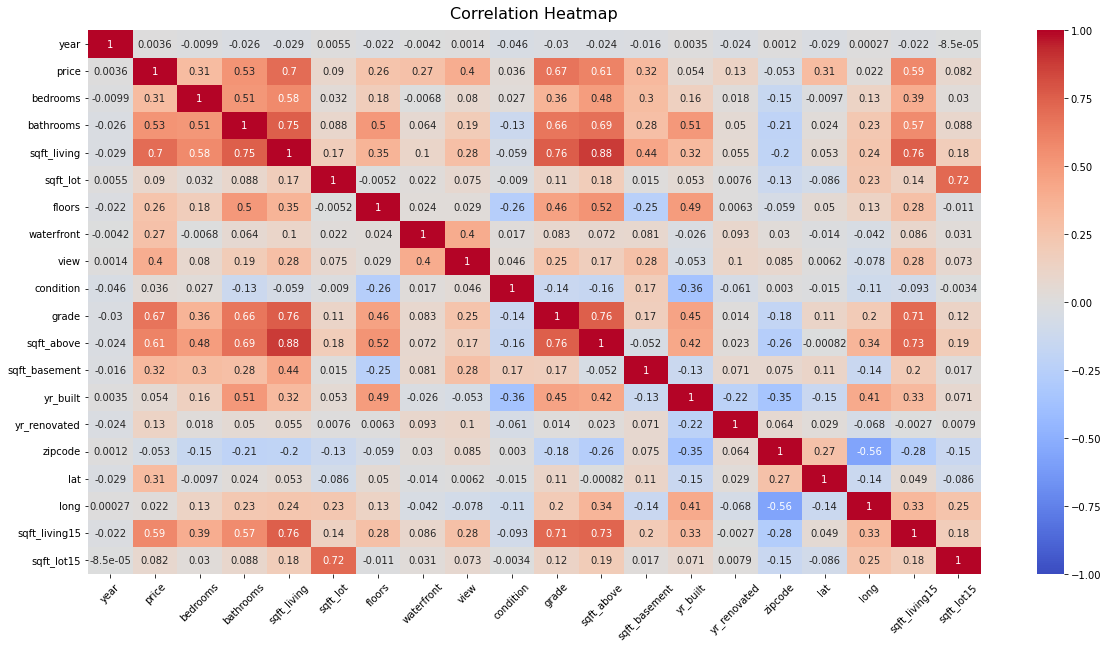

In [19]:
##correlation heatmap
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=12)
heatmap = heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 45)

In [20]:
##deleted the outlier
df = df[df.bedrooms!= 33]
df['bedrooms'].max()

11.0

(0.0, 8081250.0)

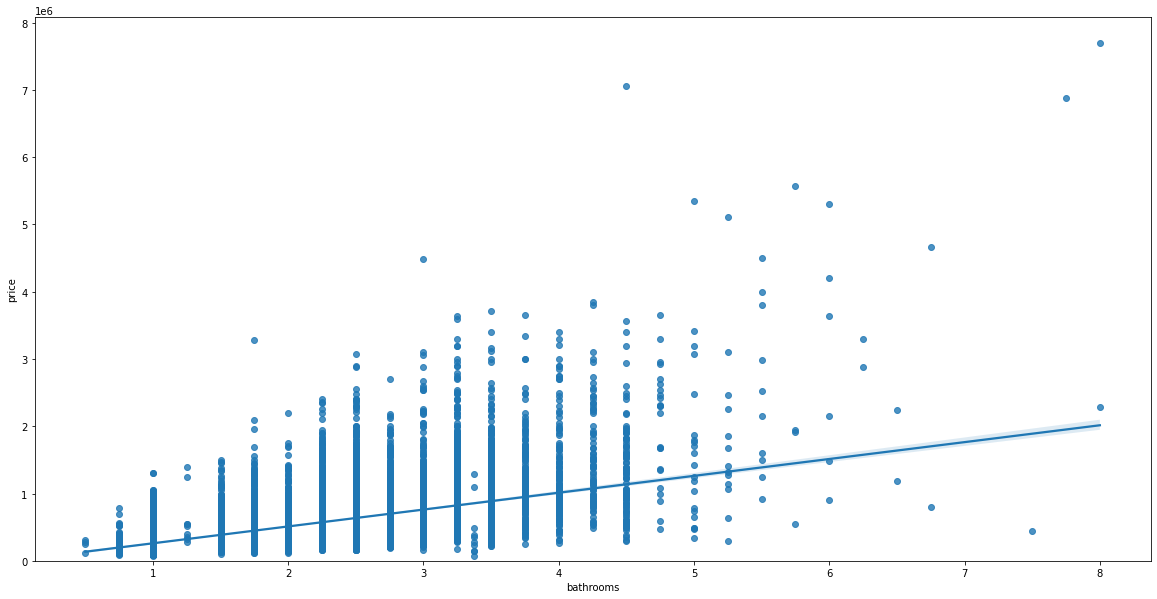

In [21]:
#regression plot
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sqftliving_regplot = sns.regplot(x = 'bathrooms', y = 'price', data = df,ax=ax)
plt.ylim(0,)

(0.0, 8081250.0)

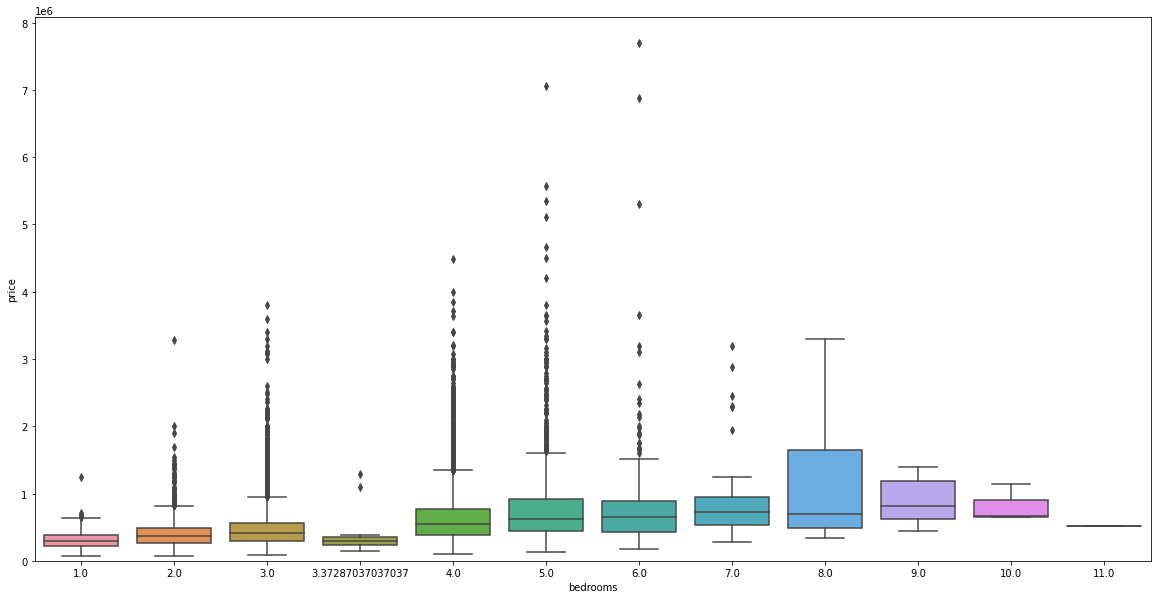

In [22]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sqftliving_regplot = sns.boxplot(x = 'bedrooms', y = 'price', data = df,ax=ax)
plt.ylim(0,)

In [23]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['bedrooms'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.3159623169242217  with a P-value of P = 0.0


In [24]:
pearson_coef, p_value = stats.pearsonr(df['bathrooms'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)


The Pearson Correlation Coefficient is 0.5252330741149646  with a P-value of P = 0.0


In [25]:
pearson_coef, p_value = stats.pearsonr(df['sqft_living'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.7020466360937231  with a P-value of P = 0.0


In [26]:
pearson_coef, p_value = stats.pearsonr(df['grade'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.6674472592985792  with a P-value of P = 0.0


In [27]:
listwanted = df[['bedrooms','bathrooms','sqft_living', 'waterfront']]
for i in listwanted.columns.tolist():
    pearson_coef, p_value = stats.pearsonr(listwanted[i], df['price'])
    print("The Pearson Correlation Coefficient of", i,"is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Correlation Coefficient of bedrooms is 0.3159623169242217 with a P-value of P = 0.0
The Pearson Correlation Coefficient of bathrooms is 0.5252330741149646 with a P-value of P = 0.0
The Pearson Correlation Coefficient of sqft_living is 0.7020466360937231 with a P-value of P = 0.0
The Pearson Correlation Coefficient of waterfront is 0.26637103503056136 with a P-value of P = 0.0


(0.0, 8084027.4371952545)

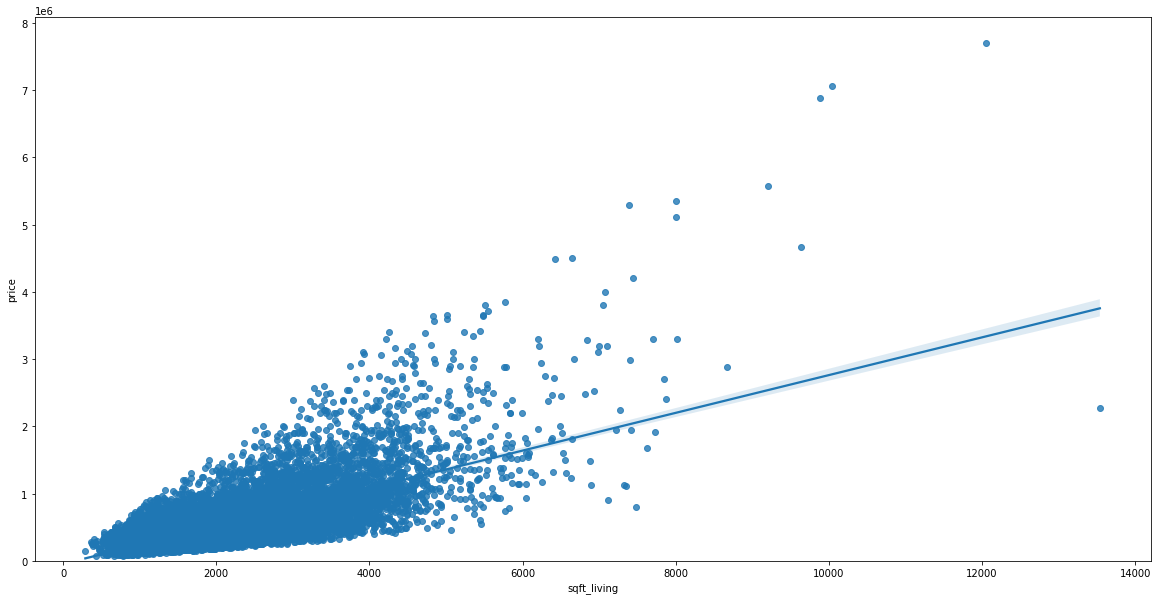

In [28]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sqftliving_regplot = sns.regplot(x = 'sqft_living', y = 'price', data = df,ax=ax)
plt.ylim(0,)

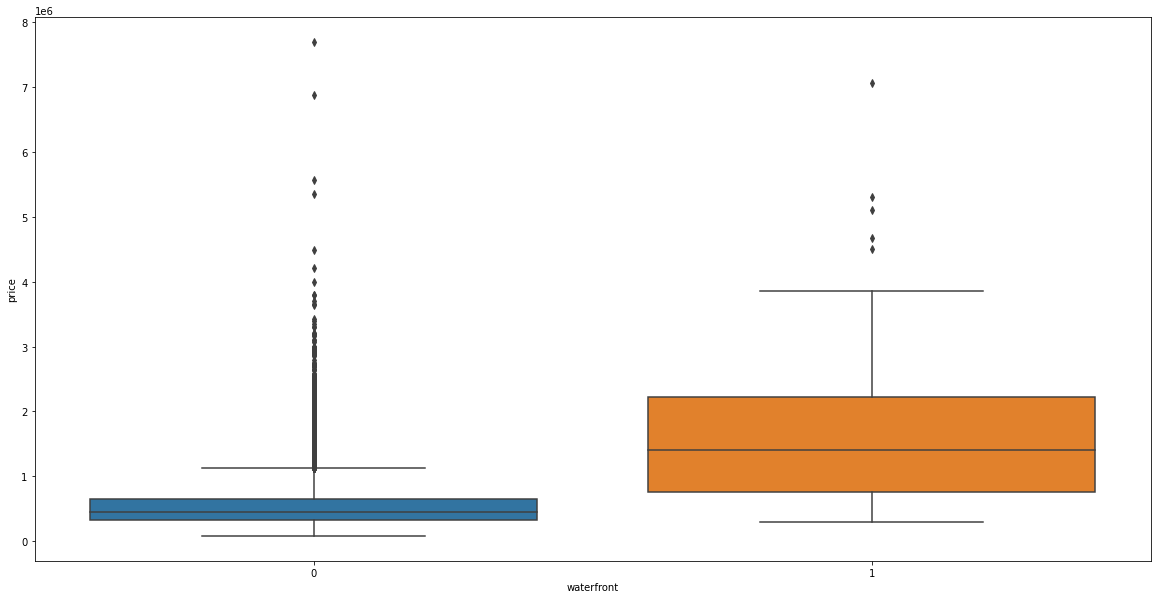

In [29]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
boxplot_w = sns.boxplot(x="waterfront",y="price", data=df, ax=ax)

C:\Users\justi\Desktop\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


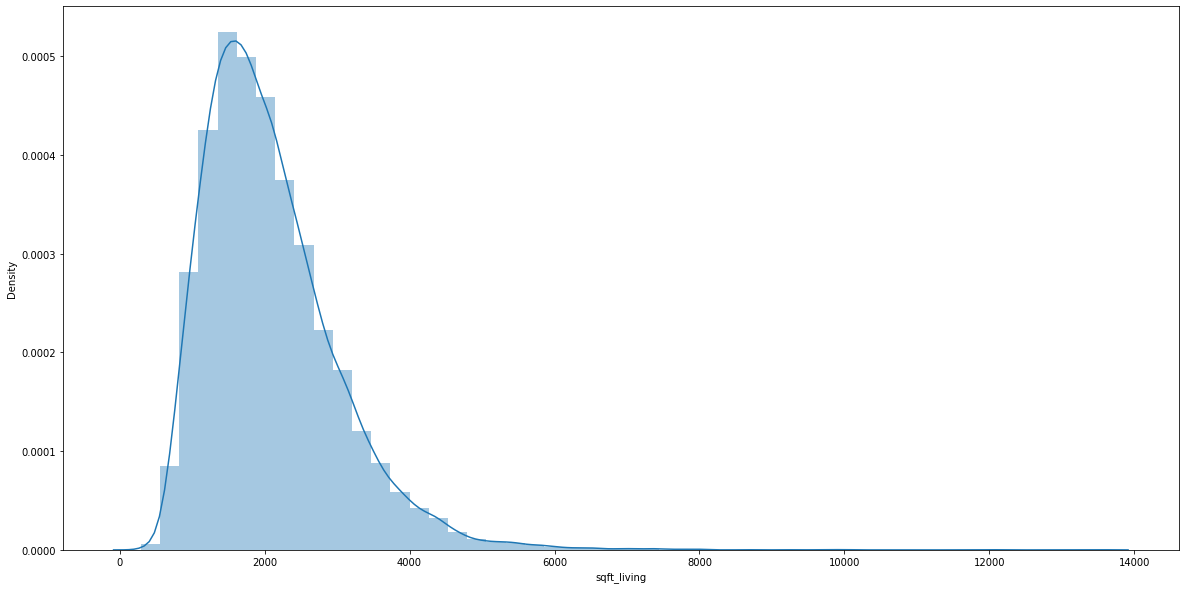

In [32]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
priceplot = sns.distplot(df['sqft_living'],ax=ax)

C:\Users\justi\Desktop\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


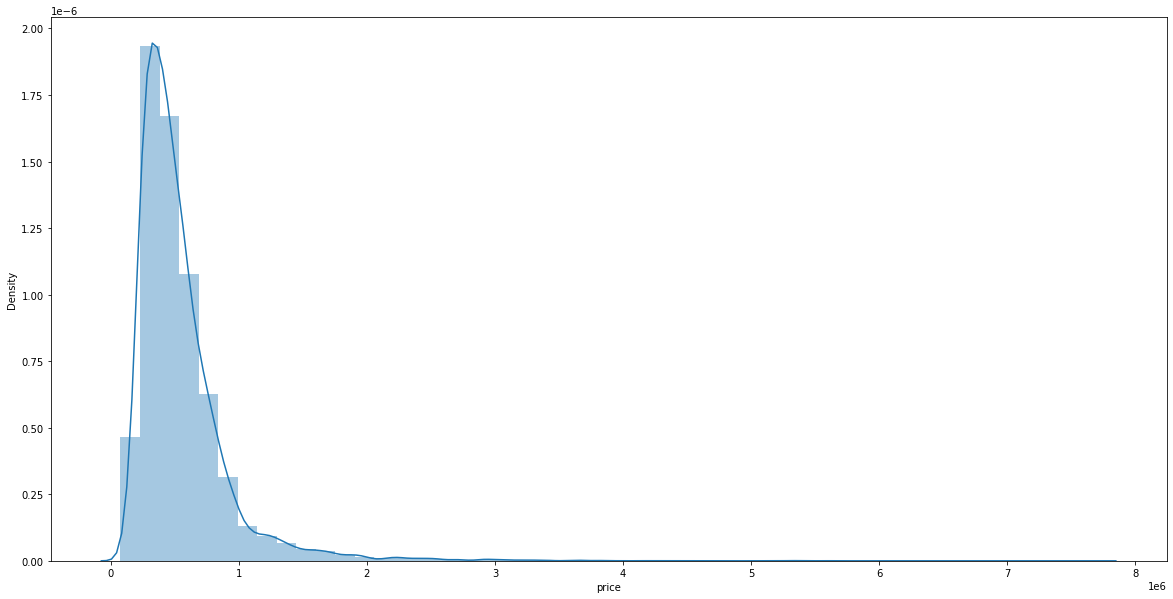

In [33]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
priceplot = sns.distplot(df['price'],ax=ax)

In [34]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

In [100]:
path = 'C:/Users/justi/Downloads/Neighborhoods_202201100942593060/Neighborhoods.shp'
street_map = gpd.read_file(path)

In [75]:
crs = {'init':'espg:4326'}

In [101]:
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]

In [102]:
geo_df = gpd.GeoDataFrame(df, geometry = geometry)

C:\Users\justi\Desktop\Python\lib\site-packages\geopandas\array.py:166: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.from_shapely(data), crs=crs)


In [103]:
geo_df.head(5)

C:\Users\justi\Desktop\Python\lib\site-packages\geopandas\array.py:175: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return vectorized.to_shapely(geoms.data)
C:\Users\justi\Desktop\Python\lib\site-packages\geopandas\array.py:175: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return vectorized.to_shapely(geoms.data)


,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,geometry
0,2014-10-13,2014,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,POINT (-122.25700 47.51120)
1,2014-12-09,2014,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,POINT (-122.31900 47.72100)
2,2015-02-25,2015,180000.0,2.0,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,POINT (-122.23300 47.73790)
3,2014-12-09,2014,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,POINT (-122.39300 47.52080)
4,2015-02-18,2015,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,POINT (-122.04500 47.61680)


C:\Users\justi\Desktop\Python\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


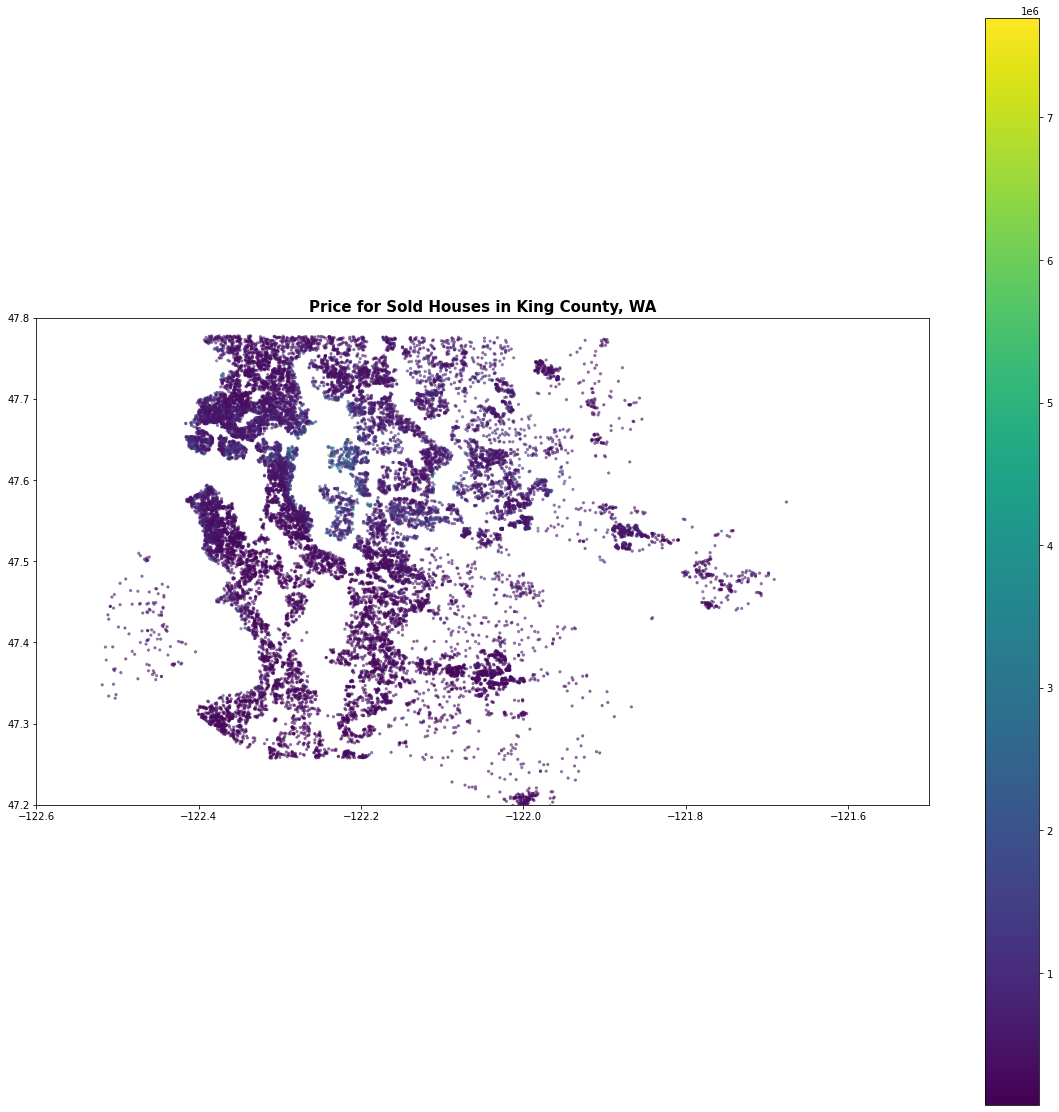

In [104]:
fig, ax = plt.subplots(figsize=(20,20))
street_map.plot(ax=ax, alpha=0.4,color='grey')
geo_df.plot(column='price',ax=ax,alpha=0.5, legend=True,markersize=5)
plt.title('Price for Sold Houses in King County, WA', fontsize=15,fontweight='bold')
plt.xlim(-122.60,-121.50)
plt.ylim( 47.2,47.8)
plt.show()

In [117]:
x = df[['bedrooms','bathrooms','sqft_living','sqft_above','grade']]
y= df['price']

In [118]:
import sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [119]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.5592743922086711

In [120]:
result = sm.OLS(y,x).fit()
print(result.summary())
import statsmodels.api as sm

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.851
Model:                            OLS   Adj. R-squared (uncentered):              0.851
Method:                 Least Squares   F-statistic:                          2.459e+04
Date:                Mon, 17 Jan 2022   Prob (F-statistic):                        0.00
Time:                        20:35:30   Log-Likelihood:                     -2.9950e+05
No. Observations:               21612   AIC:                                  5.990e+05
Df Residuals:                   21607   BIC:                                  5.990e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [229]:
import MySQLdb
## Creates connection with Database
conn= MySQLdb.connect(host='localhost', port = 3306, db='justin', user='root') 
cursor = conn.cursor()

In [228]:
## Creates a table
cursor.execute("CREATE TABLE Housing_Prices (date_ date, year_ int(20),  price float(20,5),  bedrooms float(20,5),  bathrooms float(20,5), sqft_living int(20), sqft_lot int(20), floors float, waterfront int(20), view_ int(20), condition_ int(20), grade int(20), sqft_above int(20), sqft_basement int(20), yr_built int(20), yr_renovated int(20), zipcode int(20), lat float(20,5), long_ float(20,5), sqft_living15 int(20), sqft_lot15 int(20))")

0

In [ ]:
df.rename(columns={"date":"date_", "year":"year_"}, inplace = True)

In [220]:
df.rename(columns={"long":"long_"}, inplace = True)

In [226]:
df.rename(columns={"condition":"condition_"},inplace = True)

In [232]:
df.rename(columns = {"view":"view_"}, inplace = True)

In [ ]:
##Uploads dataframe to SQL database
for index,row in df.iterrows():
    cursor.execute("Insert into Housing_Prices (date_, year_,  price,  bedrooms,  bathrooms, sqft_living, sqft_lot, floors, waterfront, view_, condition_, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long_, sqft_living15, sqft_lot15) values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)", [row['date_'],row['year_'],row['price'],row['bedrooms'],row['bathrooms'],row['sqft_living'],row['sqft_lot'],row['floors'],row['waterfront'],row['view_'],row['condition_'],row['grade'],row['sqft_above'],row['sqft_basement'],row['yr_built'],row['yr_renovated'],row['zipcode'],row['lat'],row['long_'],row['sqft_living15'],row['sqft_lot15']])
    conn.commit()
cursor.close()
conn .close()